### Vorbereitungen

yum install texlive-collection-latexextra texlive-collection-mathscience python-pip pandoc

pip install --user notebook pandas seaborn scipy

In [1]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
sns.set_theme(context='paper', style="whitegrid", color_codes=True)

In [3]:
H_column = r'$H$ in $10^3 \frac{A}{m}$'
H_column_detailed = r'$H$ in $\frac{A}{m}$'
I_column = r'$I_{max}$ in A'
M_column = r'M in $10^6\ \frac{A}{m}$'
M_column_detailed = r'M in $10^3\ \frac{A}{m}$'

In [4]:
def plot(data, hue_column=I_column, filename=None):
    img = sns.relplot(
        data=data,
        x=H_column,
        y=M_column,
        hue=hue_column,
        height=5,
        legend='full',
        
    )
    if filename is not None:
        img.figure.savefig(filename, bbox_inches='tight')

In [5]:
def subplot(data, x_column=H_column, y_column=M_column, axis=None):
    return sns.scatterplot(
        data=data,
        x=x_column,
        y=y_column,
        hue=I_column,
        marker='x',
        ax=axis        
    )

## 3.3.1

#### Overview

In [6]:
heizbar_a = pd.read_csv("3.3.1.a.csv", sep='\t')
heizbar_b = pd.read_csv("3.3.1.b.csv", sep='\t')
heizbar_c = pd.read_csv("3.3.1.c.csv", sep='\t')
heizbar_d = pd.read_csv("3.3.1.d.csv", sep='\t')

In [7]:
def H(U):
    U_max = heizbar_a.H.max()
    n_p=17
    r=1.5/100 # m
    return n_p/(2 * math.pi * r) * (3.0/U_max) * U / 1e3

In [8]:
def M(U):
    nu = 50 # Hz
    n_s = 17
    q = 0.9/10000 # m^2
    mu_0 = 4* math.pi * 1e-7
    return U / (47*nu*n_s*q*mu_0) / 1e6

In [9]:
heizbar_a[I_column] = r'3.00 $\pm$ 0.01'
heizbar_b[I_column] = r'1.00 $\pm$ 0.01'
heizbar_c[I_column] = r'0.29 $\pm$ 0.01'
heizbar_d[I_column] = r'0.10 $\pm$ 0.01'

In [10]:
heizbar_a[H_column] = heizbar_a['H'].apply(H)
heizbar_b[H_column] = heizbar_b['H'].apply(H)
heizbar_c[H_column] = heizbar_c['H'].apply(H)
heizbar_d[H_column] = heizbar_d['H'].apply(H)

heizbar_a[M_column] = heizbar_a['M'].apply(M)
heizbar_b[M_column] = heizbar_b['M'].apply(M)
heizbar_c[M_column] = heizbar_c['M'].apply(M)
heizbar_d[M_column] = heizbar_d['M'].apply(M)

Alle Messungen in einem Plot

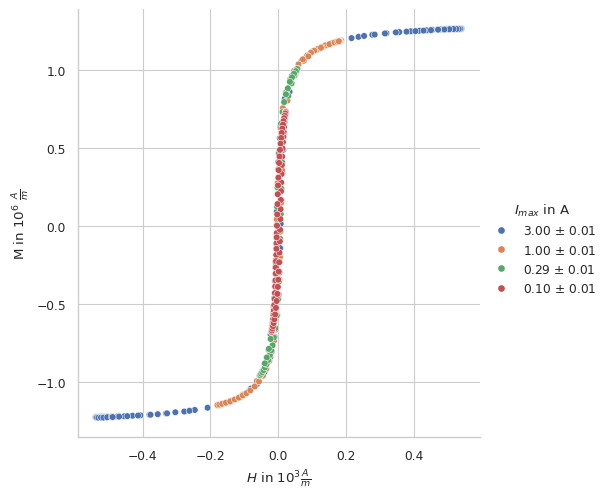

In [11]:
heizbar_all = pd.concat([heizbar_a,heizbar_b,heizbar_c,heizbar_d])
plot(heizbar_all)

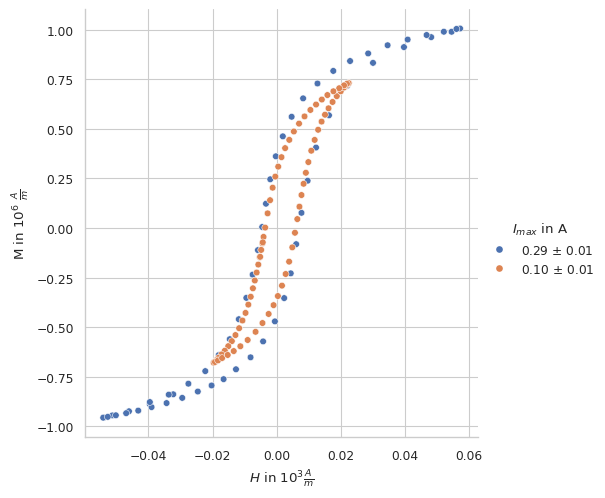

In [12]:
plot(pd.concat([heizbar_c,heizbar_d]))

Alle Messungen in verschiedenen Plots

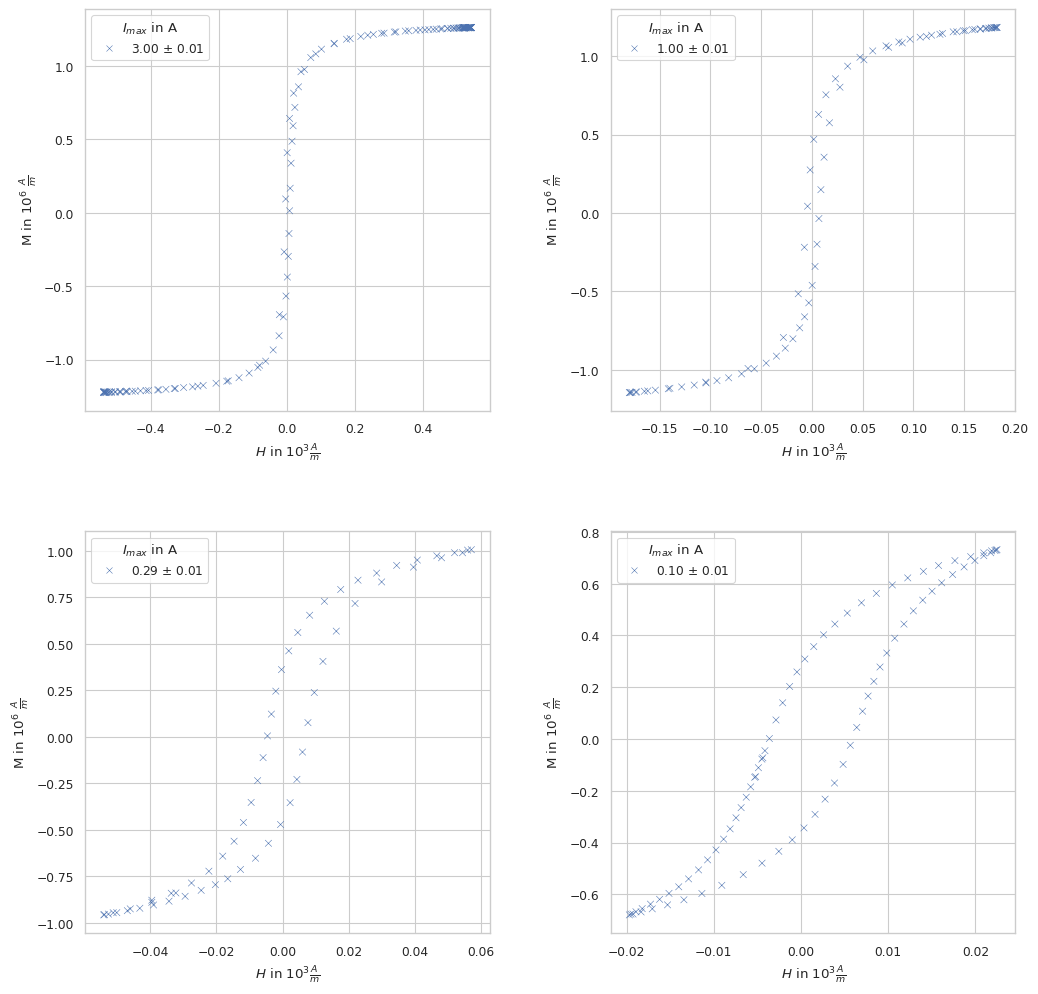

In [13]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# 4 subplots jeweils 1/2 Breite
# https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
ax = fig.add_subplot(2, 2, 1)
subplot(heizbar_a, axis=ax)

ax = fig.add_subplot(2, 2, 2)
subplot(heizbar_b, axis=ax)

ax = fig.add_subplot(2, 2, 3)
subplot(heizbar_c, axis=ax)

ax = fig.add_subplot(2, 2, 4)
subplot(heizbar_d, axis=ax)

fig.savefig('../../media/B2.4/3.3.1_single_measures.svg', bbox_inches='tight')

plt.show()

#### details & values

In [14]:
heizbar_a[H_column_detailed] = heizbar_a[H_column] * 1000
heizbar_b[H_column_detailed] = heizbar_b[H_column] * 1000
heizbar_c[H_column_detailed] = heizbar_c[H_column] * 1000
heizbar_d[H_column_detailed] = heizbar_d[H_column] * 1000

heizbar_a[M_column_detailed] = heizbar_a[M_column] * 1000
heizbar_b[M_column_detailed] = heizbar_b[M_column] * 1000
heizbar_c[M_column_detailed] = heizbar_c[M_column] * 1000
heizbar_d[M_column_detailed] = heizbar_d[M_column] * 1000

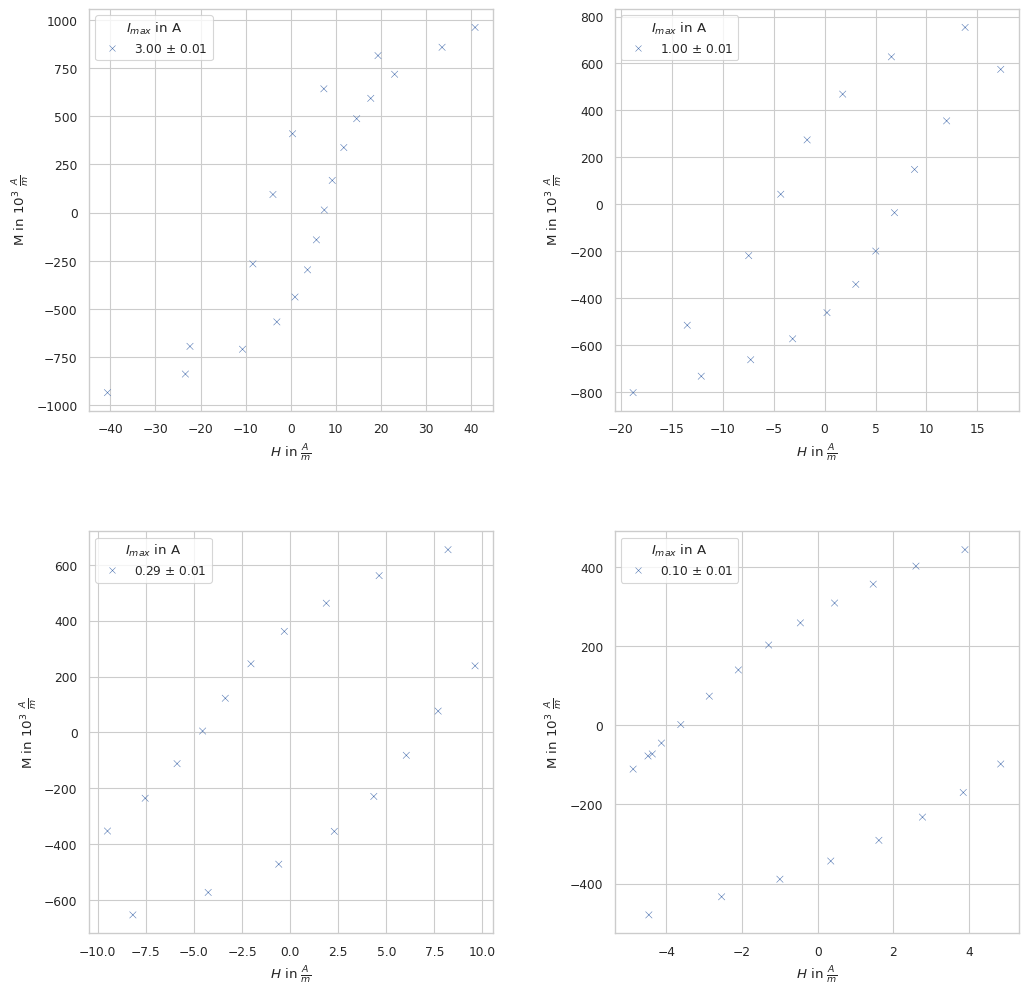

In [15]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# 4 subplots jeweils 1/2 Breite
# https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
ax = fig.add_subplot(2, 2, 1)
subplot(heizbar_a[heizbar_a[H_column].abs() < 0.05], axis=ax, x_column=H_column_detailed, y_column=M_column_detailed)

ax = fig.add_subplot(2, 2, 2)
subplot(heizbar_b[heizbar_b[H_column].abs() < 0.02], axis=ax, x_column=H_column_detailed, y_column=M_column_detailed)

ax = fig.add_subplot(2, 2, 3)
subplot(heizbar_c[heizbar_c[H_column].abs() < 0.01], axis=ax, x_column=H_column_detailed, y_column=M_column_detailed)

ax = fig.add_subplot(2, 2, 4)
subplot(heizbar_d[heizbar_d[H_column].abs() < 0.005], axis=ax, x_column=H_column_detailed, y_column=M_column_detailed)

# fig.savefig('../../media/B2.4/3.3.1_single_measures_detailed.svg', bbox_inches='tight')

plt.show()

In [16]:
heizbar_a['Ringkern'] = 'ohne Spalt'

##### ermittle Remanenz
`threshold` muss so gewählt werden, dass maximal 3 Werte herausgefiltert werden. Ideal wären zwei, falls ein Wert oben und ein Wert unten ist.

In [17]:
df = heizbar_d
threshold = 0.7

df[df[H_column_detailed].abs() < threshold][M_column_detailed]

33   -343.188088
73    309.343892
74    259.168560
Name: M in $10^3\ \frac{A}{m}$, dtype: float64

In [18]:
m = df[df[H_column_detailed].abs() < threshold][M_column_detailed].abs().mean()
d = df[df[H_column_detailed].abs() < threshold][M_column_detailed].abs().std()
print(m.round(2), r'\pm', d.round(2))

303.9 \pm 42.27


##### ermittle $H_K$
`threshold` muss so gewählt werden, dass maximal 4 Werte herausgefiltert werden. Ideal wären zwei, falls ein Wert oben und ein Wert unten ist.

In [19]:
df = heizbar_d
threshold = 50

df[df[M_column_detailed].abs() < threshold][[M_column_detailed, H_column_detailed]]

,M in $10^3\ \frac{A}{m}$,$H$ in $\frac{A}{m}$
0,-44.867783,-4.128412
38,-24.091637,5.661485
39,44.802778,6.398923
78,1.973907,-3.617576


In [20]:
m = df[df[M_column_detailed].abs() < threshold][H_column_detailed].abs().mean()
d = df[df[M_column_detailed].abs() < threshold][H_column_detailed].abs().std()
print(m.round(2), r'\pm', d.round(2))

4.95 \pm 1.3


##### $M_\mathrm{max}$

In [21]:
df = heizbar_d
m = (df[M_column_detailed].max() + abs(df[M_column_detailed].min()))/2
d = (df[M_column_detailed].max() - abs(df[M_column_detailed].min()))/2
print(m.round(2), r'\pm', d.round(2))

705.29 \pm 26.18


## 3.3.2

In [22]:
komm_a = pd.read_csv('3.3.2.a.csv', sep='\t')
komm_b = pd.read_csv('3.3.2.b.csv', sep='\t')

In [23]:
komm_a[H_column] = komm_a['H'].apply(H)
komm_b[H_column] = komm_b['H'].apply(H)

komm_a[M_column] = komm_a['M'].apply(M)
komm_b[M_column] = komm_b['M'].apply(M)

In [24]:
komm_a[I_column] = r'3.00 $\pm$ 0.01'
komm_b[I_column] = r'0.10 $\pm$ 0.01'

In [25]:
komm_a = komm_a.sort_values(by=H_column)
komm_b = komm_b.sort_values(by=H_column)

In [26]:
x_range_a = np.linspace(komm_a[H_column].min(), komm_a[H_column].max(), 100)
interp_a = np.interp(x_range_a, komm_a[H_column], komm_a[M_column])

In [27]:
x_range_b = np.linspace(komm_b[H_column].min(), komm_b[H_column].max(), 100)
interp_b = np.interp(x_range_b, komm_b[H_column], komm_b[M_column])

In [28]:
komm_b[H_column_detailed] = komm_b[H_column] * 1000

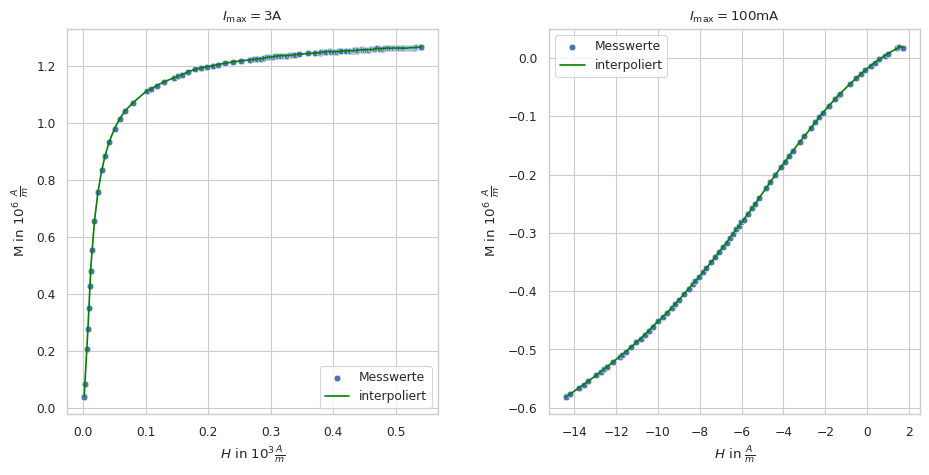

In [29]:
fig = plt.figure(figsize=(11,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax = fig.add_subplot(1, 2, 1)
plt.title(r'$I_\mathrm{max} = 3$A')
sns.scatterplot(
    data=komm_a,
    x=H_column,
    y=M_column,
    ax=ax,
    label='Messwerte'
)
plt.plot(x_range_a, interp_a, color='green', label='interpoliert')
plt.legend()

ax = fig.add_subplot(1, 2, 2)
plt.title(r'$I_\mathrm{max} = 100$mA')
sns.scatterplot(
    data=komm_b,
    x=H_column_detailed,
    y=M_column,
    ax=ax,
    label='Messwerte'
)
plt.plot(x_range_b*1000, interp_b, color='green', label='interpoliert')
plt.legend()

fig.savefig('../../media/B2.4/3.3.2_Messung.svg', bbox_inches='tight')

##### Ableitung

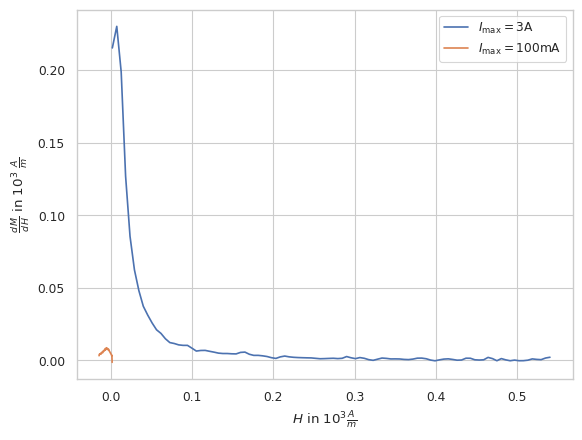

In [30]:
_, y_a = np.gradient([x_range_a, interp_a])
_, y_b = np.gradient([x_range_b, interp_b])

fig = plt.figure()

plt.plot(x_range_a, y_a[1], label=r'$I_\mathrm{max} = 3$A')
plt.plot(x_range_b, y_b[1], label=r'$I_\mathrm{max} = 100$mA')

plt.xlabel(H_column)
plt.ylabel(r'$\frac{d\,M}{d\,H}$ in $10^3\ \frac{A}{m}$')

plt.legend()

fig.savefig('../../media/B2.4/3.3.2_Ableitung.svg', bbox_inches='tight')

## 3.3.3

In [31]:
data = pd.read_csv('3.3.3.csv', sep='\t')
data[I_column] = r'3.00 $\pm$ 0.01'
T_column = r'T in $^\circ$C'
data[T_column] = data['T']
data[M_column] = data['M'].apply(M)
data[M_column] /= 1e3

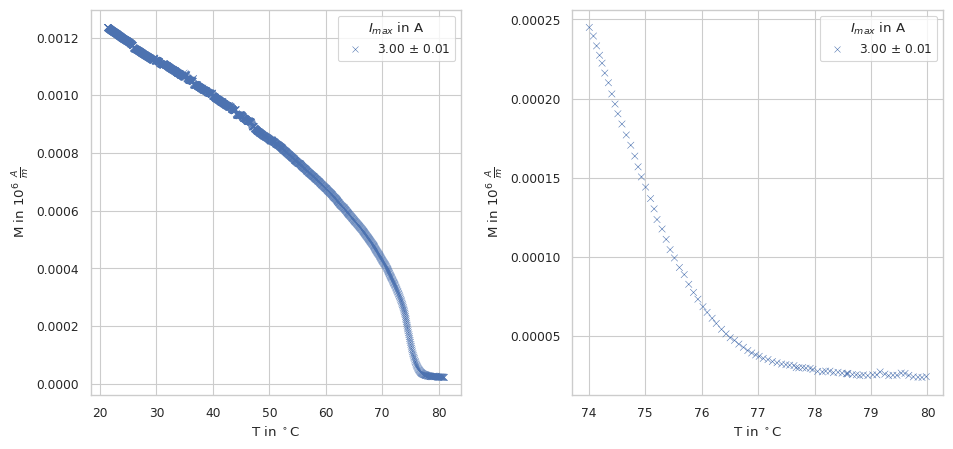

In [32]:
fig = plt.figure(figsize=(11,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    data=data,
    x=T_column,
    y=M_column,
    hue=I_column,
    marker='x',
    legend='full',
    ax=ax
)

ax = fig.add_subplot(1, 2, 2)
sns.scatterplot(
    data=data[(data[T_column] > 74)&(data[T_column] < 80)],
    x=T_column,
    y=M_column,
    hue=I_column,
    marker='x',
    legend='full',
    ax=ax
)

fig.savefig('../../media/B2.4/3.3.3.svg', bbox_inches='tight')

## 3.3.4

Messungsdetails:
* 3.4.1: 0.94A
* 3.4.2: 3.0A, 1mm
* 3.4.3: 2.12A, 0.5mm
* 3.4.4: 1.27A, 0.2mm
* 3.4.5: 1.0A, 0.125mm
* 3.4.6: 0.79A, 0.075mm
* 3.4.7: 0.50A, 0.0mm

In [33]:
spalt_a = pd.read_csv('3.4.1.csv', sep='\t')
spalt_b = pd.read_csv('3.4.2.csv', sep='\t')
spalt_c = pd.read_csv('3.4.3.csv', sep='\t')
spalt_d = pd.read_csv('3.4.4.csv', sep='\t')
spalt_e = pd.read_csv('3.4.5.csv', sep='\t')
spalt_f = pd.read_csv('3.4.6.csv', sep='\t')
spalt_g = pd.read_csv('3.4.7.csv', sep='\t')

Fixme: Die Länge des Spalts muss eingerechnet werden.

In [34]:
def H_spalt(U):
    U_max = spalt_a.H.max()
    n_p=54
    r=1.5/100 # m
    return n_p/(2 * math.pi * r) * (3.0/U_max) * U / 1e3

In [35]:
spalt_a[H_column] = spalt_a['H'].apply(H_spalt)
spalt_b[H_column] = spalt_b['H'].apply(H_spalt)
spalt_c[H_column] = spalt_c['H'].apply(H_spalt)
spalt_d[H_column] = spalt_d['H'].apply(H_spalt)
spalt_e[H_column] = spalt_e['H'].apply(H_spalt)
spalt_f[H_column] = spalt_f['H'].apply(H_spalt)
spalt_g[H_column] = spalt_g['H'].apply(H_spalt)

spalt_a[M_column] = spalt_a['M'].apply(M)
spalt_b[M_column] = spalt_b['M'].apply(M)
spalt_c[M_column] = spalt_c['M'].apply(M)
spalt_d[M_column] = spalt_d['M'].apply(M)
spalt_e[M_column] = spalt_e['M'].apply(M)
spalt_f[M_column] = spalt_f['M'].apply(M)
spalt_g[M_column] = spalt_g['M'].apply(M)

In [36]:
spalt_a['Ringkern'] = 'mit Spalt'

S_column = 'Spaltbreite'
spalt_b[S_column] = r'2.00 mm'
spalt_c[S_column] = r'1.00 mm'
spalt_d[S_column] = r'0.40 mm'
spalt_e[S_column] = r'0.25 mm'
spalt_f[S_column] = r'0.15 mm'
spalt_g[S_column] = r'0.00 mm'

#### Vergleich

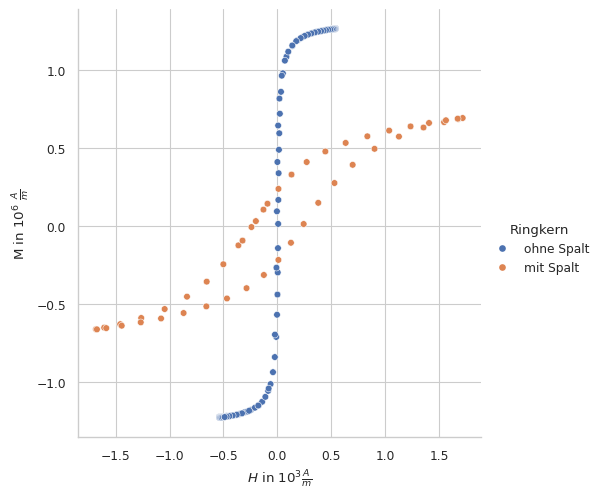

In [37]:
def plot(data, hue_column=I_column, filename=None):
    img = sns.relplot(
        data=data,
        x=H_column,
        y=M_column,
        hue=hue_column,
        height=5,
        legend='full',
        
    )
    if filename is not None:
        img.figure.savefig(filename, bbox_inches='tight')

plot(pd.concat([heizbar_a, spalt_a]), hue_column='Ringkern') #, filename='../../media/B2.4/3.3.3_comparison.svg')

In [38]:
spalt_a[H_column_detailed] = spalt_a[H_column] * 1000
spalt_a[M_column_detailed] = spalt_a[M_column] * 1000
spalt_a[I_column] = r'0.94 \pm 0.01 A'

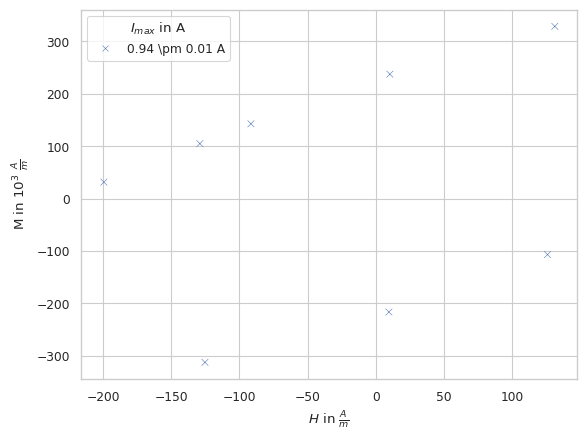

In [39]:
subplot(spalt_a[spalt_a[H_column_detailed].abs() < 200], x_column=H_column_detailed, y_column=M_column_detailed);

##### ermittle Remanenz
`threshold` muss so gewählt werden, dass maximal 3 Werte herausgefiltert werden. Ideal wären zwei, falls ein Wert oben und ein Wert unten ist.

In [40]:
df = spalt_a
threshold = 100

df[df[H_column_detailed].abs() < threshold][M_column_detailed
]

21   -216.736368
43    237.407872
44    142.691131
Name: M in $10^3\ \frac{A}{m}$, dtype: float64

In [41]:
m = df[df[H_column_detailed].abs() < threshold][M_column_detailed].abs().mean()
d = df[df[H_column_detailed].abs() < threshold][M_column_detailed].abs().std()
print(m.round(2), r'\pm', d.round(2))

198.95 \pm 49.8


##### ermittle $H_K$
`threshold` muss so gewählt werden, dass maximal 4 Werte herausgefiltert werden. Ideal wären zwei, falls ein Wert oben und ein Wert unten ist.

In [42]:
df = spalt_a
threshold = 50

df[df[M_column_detailed].abs() < threshold][[M_column_detailed, H_column_detailed]]

,M in $10^3\ \frac{A}{m}$,$H$ in $\frac{A}{m}$
1,-6.707348,-240.342553
23,12.799964,244.102602
45,31.351007,-199.387561


In [43]:
m = df[df[M_column_detailed].abs() < threshold][H_column_detailed].abs().mean()
d = df[df[M_column_detailed].abs() < threshold][H_column_detailed].abs().std()
print(m.round(2), r'\pm', d.round(2))

227.94 \pm 24.8


##### $M_\mathrm{max}$

In [44]:
df = spalt_a
m = (df[M_column_detailed].max() + abs(df[M_column_detailed].min()))/2
d = (df[M_column_detailed].max() - abs(df[M_column_detailed].min()))/2
print(m.round(2), r'\pm', d.round(2))

675.28 \pm 14.92


#### Entmagnetisierungsfaktor

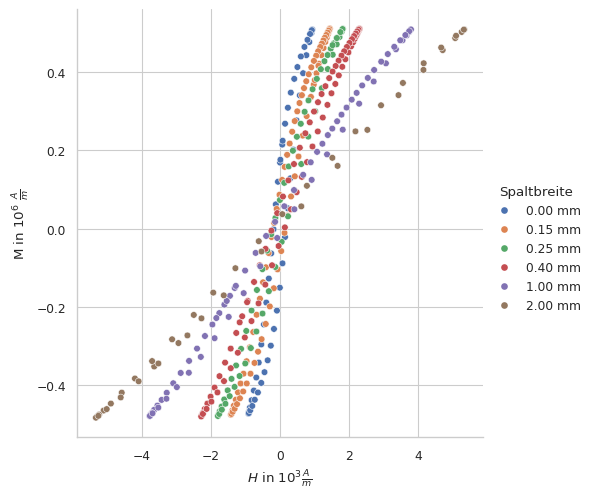

In [45]:
spalt_all = pd.concat([spalt_g,spalt_f,spalt_e,spalt_d,spalt_c,spalt_b])
plot(spalt_all, hue_column=S_column, filename='../../media/B2.4/3.3.3_overview.svg')

Entmagnetisierungsfelder

In [46]:
df = spalt_f

avg = (df[H_column].max() - spalt_g[H_column].max() - (df[H_column].min() - spalt_g[H_column].min()))/2
err = abs((df[H_column].max() - spalt_g[H_column].max() + (df[H_column].min() - spalt_g[H_column].min()))/2)
print(df['Spaltbreite'][0])
print(avg.round(3), r'\pm', err.round(3))

0.15 mm
0.508 \pm 0.001


##### $M_\mathrm{max}$

In [47]:
df = spalt_g
m = (df[M_column].max() + abs(df[M_column].min()))/2
d = (df[M_column].max() - abs(df[M_column].min()))/2
print(df['Spaltbreite'][0])
print(m.round(2), r'\pm', d.round(2))

0.00 mm
0.49 \pm 0.02


##### N experimentell
Hier ist $M$ um einen Faktor $10^3$ verändert, da die Größenordnung von $H$ und $M$ sich um diesen Faktor unterscheidet.

Die zurückgegebenen Werte werden in $10^{-3}\frac{A}{m}$ angegeben.

In [48]:
def N(delta_H):
    M_max = 0.495 * 1e3

    avg = delta_H / M_max
    return round(avg * 1e3, 3)

In [49]:
def N_err(delta_H, delta_H_err):
    # fix magnitude
    h = delta_H * 1e3
    err_h = delta_H_err * 1e3

    # constants
    M_max = 0.495 * 1e6
    err_M = 0.025 * 1e6

    err_squared = (err_h/M_max)**2 + (h*err_M/(M_max**2))**2
    return round(math.sqrt(err_squared) * 1e3, 3)

In [50]:
def N_theo(l_L):
    R = 15 # mm
    return round(l_L / (2*math.pi*R + l_L) * 1e3, 3)

In [51]:
spaltbreiten = [0, 0.15, 0.25, 0.4, 1, 2]
delta_H = [(0,0), (0.508, 0.001), (0.885, 0.001), (1.368, 0.001), (2.860, 0.004), (4.410, 0.009)]

N_exp_result = [ N(h) for h, err in delta_H ]
N_exp_err = [ N_err(h, err) for h, err in delta_H ]
N_theo_result = [ N_theo(d) for d in spaltbreiten ]

In [52]:
df = pd.DataFrame(
    {
        '$l_L$ in [mm]': spaltbreiten,
        '$N$': N_exp_result,
        r'$\Delta N$': N_exp_err,
        r'$N_\mathrm{theo}$': N_theo_result
    }
)
df

,$l_L$ in [mm],$N$,$\Delta N$,$N_\mathrm{theo}$
0,0.00,0.000,0.000,0.000
1,0.15,1.026,0.052,1.589
2,0.25,1.788,0.090,2.646
3,0.40,2.764,0.140,4.226
4,1.00,5.778,0.292,10.499
5,2.00,8.909,0.450,20.780


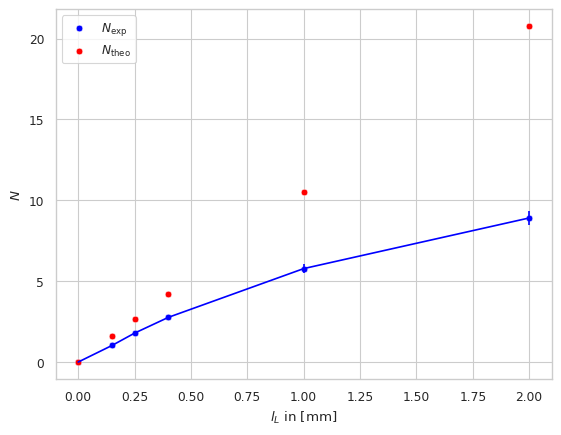

In [53]:
ax = sns.scatterplot(df, x='$l_L$ in [mm]', y='$N$', label=r'$N_\mathrm{exp}$', color='blue')
sns.scatterplot(df, x='$l_L$ in [mm]', y=r'$N_\mathrm{theo}$', label=r'$N_\mathrm{theo}$', color='red', ax=ax)
sns.mpl.pyplot.errorbar(x=df['$l_L$ in [mm]'], y=df['$N$'], yerr=df[r'$\Delta N$'], color='blue')

ax.figure.savefig('../../media/B2.4/3.3.4_N.svg', bbox_inches='tight')